In [ ]:
# Creating LSTM, Tree Prediction and Linear Regression - Final Project 

# On this LSTM Model 75% of the data was trained and 25%  was tested to predict Apple stock price using the past 60 days closing price.
# The data was taken from Yahoo from 2010-01-04 until 2010-03-16.
# The LSTM-rsme is 24.37
# The predicted price for the March 17th = USS 123.5
# The predicted price for the March 18th = USS 128.5


# Dependencies
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
plt.style.use('fivethirtyeight')

# second model
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
# getting the Stock data

endDate = datetime.datetime.now()
AAPL_df = web.DataReader('AAPL', data_source='yahoo', start='2010-01-01', end = endDate)
AAPL_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.583586
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.594968
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.490066
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.478067
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.521136
...,...,...,...,...,...,...
2021-03-11,123.209999,121.260002,122.540001,121.959999,102753600.0,121.959999
2021-03-12,121.169998,119.160004,120.400002,121.029999,87963400.0,121.029999
2021-03-15,124.000000,120.419998,121.410004,123.989998,92403800.0,123.989998


In [ ]:
AAPL_df.shape

(2820, 6)

In [ ]:
# create a closing price dataset
Closing_Price_AAPL_df = AAPL_df.filter(['Close'])

# convert the the closing price dataset to a array
Closing_Price_array_AAPL_df = Closing_Price_AAPL_df.values

Closing_Price_array_AAPL_df

array([[  7.64321423],
       [  7.65642881],
       [  7.53464317],
       ...,
       [123.98999786],
       [125.56999969],
       [123.76499939]])

In [ ]:
# get the number of rows to train the model on (75 %)
train_closing_price_AAPL_len = math.ceil(len(Closing_Price_array_AAPL_df) * 0.75) # rounded up

train_closing_price_AAPL_len

2115

In [ ]:
# Scale de closing price dataset between 0 and 1
scale_AAPL = MinMaxScaler(feature_range=(0,1))
scaled_closing_price_AAPL_df = scale_AAPL.fit_transform(Closing_Price_array_AAPL_df)
scaled_closing_price_AAPL_df

array([[0.00575406],
       [0.00585102],
       [0.00495751],
       ...,
       [0.85935543],
       [0.87094743],
       [0.85770469]])

In [ ]:
# Training Data
train_closing_price_AAPL = scaled_closing_price_AAPL_df[0:train_closing_price_AAPL_len, :]
# Split Data
x_train =[]
y_train=[]

for i in range(60, len(train_closing_price_AAPL)):
  x_train.append(train_closing_price_AAPL[i-60:i,0])
  y_train.append(train_closing_price_AAPL[i,0])


In [ ]:
# convert to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)


In [ ]:
# Reshape the dataset
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(2055, 60, 1)

In [ ]:
# Building the LSTM model
#x_train = tf.convert_to_tensor(x_train)
#y_train = tf.convert_to_tensor(y_train)

AAPL_model = Sequential()
AAPL_model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1],1)))
AAPL_model.add(LSTM(50, return_sequences=False))
AAPL_model.add(Dense(25))
AAPL_model.add(Dense(1))

In [ ]:
# Compile  the LSTM model
AAPL_model.compile(optimizer='adam', loss='mean_squared_error')
#'categorical_crossentropy'

In [ ]:
# training the AAPL_model
AAPL_model.fit(x_train,y_train,epochs=1,batch_size=1)

2055/2055 [==============================] - 53s 24ms/step - loss: 5.0463e-04


In [ ]:
# Setting the testing Dataset
# Setting the scaled testing dataset 
AAPL_test_dataset= scaled_closing_price_AAPL_df[train_closing_price_AAPL_len - 60: , :]

#setting the x and y test data
x_test = []
y_test = Closing_Price_array_AAPL_df[train_closing_price_AAPL_len, :]
for i in range(60,len(AAPL_test_dataset)):
    x_test.append(AAPL_test_dataset[i-60:i, 0])


In [ ]:
# Convert the test dataset to array
x_test = np.array(x_test)
#print (x_test)

In [ ]:
#reshape the test dataset
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
x_test.shape

(705, 60, 1)

In [ ]:
# getting the model predicted closing price value
predictions = AAPL_model.predict(x_test)
predictions = scale_AAPL.inverse_transform(predictions)

In [ ]:
# getting the root mean squared error 
rmse = np.sqrt(np.mean(predictions - y_test) **2)
print ('the rmse for the model is: ', rmse)

the rmse for the model is:  24.37657392785904


In [ ]:
# Predict future data

apple_data = web.DataReader('AAPL', data_source='yahoo', start = '2010-01-01', end=endDate)


# new df
new_df = apple_data.filter(['Close'])

#get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

#Scale the data to be values between 0 and 1
last_60_days_scaled = scale_AAPL.transform(last_60_days)

#Create ant empty list
X_test = []

#Append the past 60 days
X_test.append(last_60_days_scaled)

#convert the Xtest data set to a numpy array
X_test =np.array(X_test)

#get predicted scaled price
pred_price = AAPL_model.predict(X_test)

#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

#Get the predicted scale price
pred_price = AAPL_model.predict(X_test)

#undo the scaling
pred_price = scale_AAPL.inverse_transform(pred_price)

print(f'Predicted price for tomorrow is:', pred_price)


Predicted price for tomorrow is: [[128.54088]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


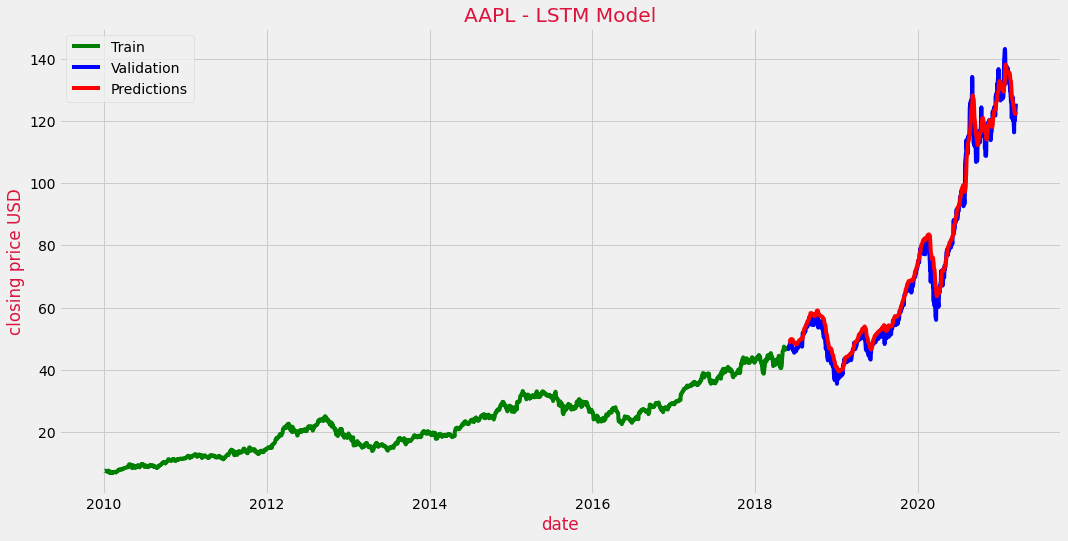

In [ ]:
# Plot the Dataset
train_data = Closing_Price_AAPL_df[:train_closing_price_AAPL_len]
validation_data = Closing_Price_AAPL_df[train_closing_price_AAPL_len:]

validation_data['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('AAPL - LSTM Model', color='crimson')
plt.xlabel('date', color='crimson')
plt.ylabel('closing price USD', color='crimson')
plt.plot(train_data['Close'], color='green')
plt.plot(validation_data['Close'], color='blue')
plt.plot(validation_data['Predictions'], color = 'red')
plt.legend(['Train', 'Validation', 'Predictions'])


In [ ]:
validation_data 

,Close,Predictions
Date,,
2018-05-30,46.875000,48.814686
2018-05-31,46.717499,48.830875
2018-06-01,47.560001,48.815380
2018-06-04,47.957500,48.893299
2018-06-05,48.327499,49.054424
...,...,...
2021-03-10,119.980003,122.753082
2021-03-11,121.959999,122.350342
2021-03-12,121.029999,122.336143


# Second Model Linear Regression and Tree Model


In [ ]:
AAPL_df.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.583586
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.594968
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.490066
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.478067
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.521136


In [ ]:
AAPL_df.shape

(2819, 6)

In [ ]:
# Getting the close price
Close_df = AAPL_df[['Close']]
Close_df



,Close
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714
...,...
2021-03-10,119.980003
2021-03-11,121.959999
2021-03-12,121.029999


In [ ]:
# Creating variable to predict 30 days future
future = 30

# new column
Close_df['Prediction'] = Close_df[['Close']].shift(-future)

# Prediction columns
Close_df.tail()




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Close,Prediction
Date,,
2021-03-10,119.980003,NaN
2021-03-11,121.959999,NaN
2021-03-12,121.029999,NaN
2021-03-15,123.989998,NaN
2021-03-16,125.570000,NaN


In [ ]:
# Created the future Dataset --30
X_value =np.array(Close_df.drop(['Prediction'],1))[:-future]
X_value


NameError: ignored

In [ ]:
# Created a Target dataset and converted to an array
y_value = np.array(Close_df['Prediction'])[:-future]
y_value



array([  7.23392916,   7.24749994,   7.20249987, ..., 121.02999878,
       123.98999786, 125.56999969])

In [ ]:
# Split Data --training 75% and testing 25%
x_train, xtest, y_train, y_test = train_test_split(X_value,y_value, test_size = 0.25)
xtest.shape

NameError: ignored

In [ ]:
# Creating the Model
# Decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

#Create the linear regression model
linearR  = LinearRegression().fit(x_train, y_train)

In [ ]:
# Getting the future dataset rows
r_future = Close_df.drop(['Prediction'],1)[:-future]
r_future = r_future.tail(future)
r_future = np.array(r_future)


In [ ]:
# print the values for both models

# Model tree prediction
tree_prediction = tree.predict(r_future)
print('----Tree Prediction Data--------')
print(tree_prediction)

#Model linear regression prediction
LR_Prediction = linearR.predict(r_future)
print('')
print('----Linear Prediction Data--------')
print(LR_Prediction)

----Tree Prediction Data--------
[120.98999786 133.94000244 137.38999939 136.75999451 126.
 136.00999451 121.02999878 135.13000488 135.36999512 136.00999451
 130.83999634 129.71000671 129.86999512 126.         136.00999451
 125.34999847 120.98999786 121.26000214 127.79000092 125.12000275
 122.05999756 136.00999451 121.02999878 116.36000061 121.08999634
 121.08999634 121.95999908 121.02999878 123.98999786 121.19000244]

----Linear Prediction Data--------
[133.65357499 131.53303504 133.16501634 136.95914168 136.0028185
 137.05269142 141.95905617 140.06718806 138.87178805 137.80112101
 134.39161546 136.05478    131.47066062 135.96123027 137.13585202
 133.94462918 133.75752971 135.93004702 133.87187356 132.03198281
 132.74922917 137.11505791 142.14615564 144.43303266 148.43503573
 148.68451755 147.54107904 142.37484334 137.04230229 139.30836933]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


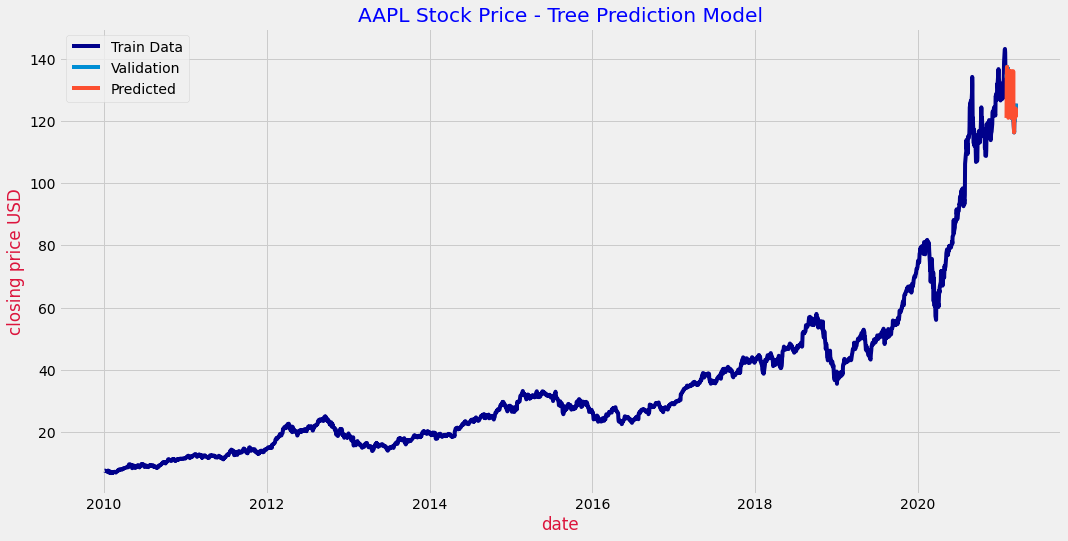

In [ ]:
# Visual
predictionsTree = tree_prediction

validTree = Close_df[X_value.shape[0]:]
validTree['Predictions'] = predictionsTree

plt.figure(figsize=(16,8))
plt.title('AAPL Stock Price - Tree Prediction Model', color='blue')
plt.xlabel('date', color='crimson')
plt.ylabel('closing price USD', color='crimson')

plt.plot(Close_df['Close'], color='darkblue')
plt.plot(validTree[['Close','Predictions']])
#plt.plot(validLR[['Close','Predictionslr' ]], color='green')


plt.legend(['Train Data', 'Validation','Predicted'])





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


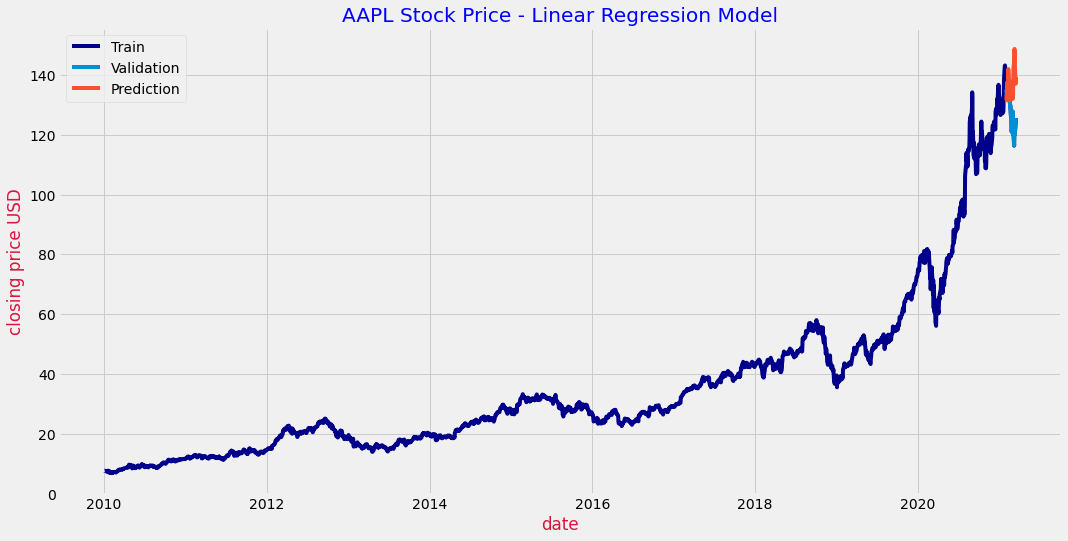

In [ ]:
# Visual

predictionslr = LR_Prediction

validLR = Close_df[X_value.shape[0]:]
validLR['Predictionslr'] = predictionslr


plt.figure(figsize=(16,8))

plt.title('AAPL Stock Price - Linear Regression Model', color='blue')
plt.xlabel('date', color='crimson')
plt.ylabel('closing price USD', color='crimson')

plt.plot(Close_df['Close'], color='darkblue')
#plt.plot(validTree[['Close','Predictions']])
plt.plot(validLR[['Close','Predictionslr' ]])


plt.legend(['Train', 'Validation','Prediction'])
